In [1]:
%matplotlib inline 
import requests
import math
import pprint # for pretty printing
import os # listing and managing file patho
import zipfile # for zip and unzip utilities
import pandas # for data analysis
import csv#导入numpy的库函数
import numpy as np
import matplotlib.pyplot as plt # for plotting
from textblob import TextBlob
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer # for converting documents in word count

In [22]:
#QUESTION 1   ANSWER:
sms_zip_file = 'smsspamcollection.zip'
assert os.path.exists(sms_zip_file)  , "directory doesn't contain {}".format(sms_zip_file)

In [2]:
with  open('./data/SMSSpamCollection', 'r') as f:
    sms_messages = f.readlines()
sms_messages = [m.rstrip() for m in sms_messages]
messages = pandas.read_csv('./data/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
messages['length'] = messages['message'].map(lambda text: len(text))

In [81]:
#QUESTION 2   ANSWER:

messages[messages.label=='ham'].groupby('length').describe()

label                  message         \
       count unique  top freq   count unique   
length                                         
2          4      1  ham    4       4      1   
3          8      1  ham    8       8      4   
4          6      1  ham    6       6      3   
5         11      1  ham   11      11      2   
6          3      1  ham    3       3      3   
7         10      1  ham   10      10      7   
8          5      1  ham    5       5      5   
9          9      1  ham    9       9      6   
10         4      1  ham    4       4      4   
11         7      1  ham    7       7      6   
12         5      1  ham    5       5      5   
13        10      1  ham   10      10     10   
14        10      1  ham   10      10      9   
15        13      1  ham   13      13     13   
16         6      1  ham    6       6      6   
17        13      1  ham   13      13     13   
18        11      1  ham   11      11     11   
19        17      1  ham   17      17     17   
20        12      1  ham   12      12     12   
21        19      1  ham   19      19     19   
22       120      1  ham  120     120     88   
23        95      1  ham   95      95     87   
24        98      1  ham   98      98     89   
25        84      1  ham   84      84     81   
26        85      1  ham   85      85     79   
27        81      1  ham   81      81     75   
28        87      1  ham   87      87     77   
29        78      1  ham   78      78     75   
30        75      1  ham   75      75     74   
31        78      1  ham   78      78     77   
...      ...    ...  ...  ...     ...    ...   
301        1      1  ham    1       1      1   
306        1      1  ham    1       1      1   
316        2      1  ham    2       2      1   
320        1      1  ham    1       1      1   
322        1      1  ham    1       1      1   
324        3      1  ham    3       3      1   
327        2      1  ham    2       2      2   
329        3      1  ham    3       3      2   
332        1      1  ham    1       1      1   
338        1      1  ham    1       1      1   
363        1      1  ham    1       1      1   
368        1      1  ham    1       1      1   
372        1      1  ham    1       1      1   
375        1      1  ham    1       1      1   
379        1      1  ham    1       1      1   
382        1      1  ham    1       1      1   
384        1      1  ham    1       1      1   
408        1      1  ham    1       1      1   
415        1      1  ham    1       1      1   
431        1      1  ham    1       1      1   
444        3      1  ham    3       3      1   
446        2      1  ham    2       2      1   
458        1      1  ham    1       1      1   
461        1      1  ham    1       1      1   
482        1      1  ham    1       1      1   
588        2      1  ham    2       2      1   
611        1      1  ham    1       1      1   
629        1      1  ham    1       1      1   
790        1      1  ham    1       1      1   
910        1      1  ham    1       1      1   

                                                                
                                                      top freq  
length                                                          
2                                                      Ok    4  
3                                                     Ok.    4  
4                                                    Okie    4  
5                                                   Ok...   10  
6                                                  ALRITE    1  
7                                                 Okie...    3  
8                                                Thank u!    1  
9                                               Ok lor...    3  
10                                             East coast    1  
11                                            Ok thanx...    2  
12                                           Ard 4 lor...    1  
13                      

In [82]:
messages[messages.label=='spam'].groupby('length').describe()

label                   message         \
       count unique   top freq   count unique   
length                                          
13         1      1  spam    1       1      1   
18         1      1  spam    1       1      1   
24         1      1  spam    1       1      1   
30         1      1  spam    1       1      1   
33         3      1  spam    3       3      3   
37         1      1  spam    1       1      1   
40         1      1  spam    1       1      1   
41         1      1  spam    1       1      1   
42         1      1  spam    1       1      1   
44         1      1  spam    1       1      1   
45         1      1  spam    1       1      1   
47         2      1  spam    2       2      2   
48         2      1  spam    2       2      2   
49         2      1  spam    2       2      2   
50         2      1  spam    2       2      1   
51         1      1  spam    1       1      1   
52         1      1  spam    1       1      1   
59         1      1  spam    1       1      1   
63         1      1  spam    1       1      1   
64         1      1  spam    1       1      1   
65         2      1  spam    2       2      2   
66         1      1  spam    1       1      1   
68         1      1  spam    1       1      1   
69         3      1  spam    3       3      3   
70         2      1  spam    2       2      2   
71         2      1  spam    2       2      2   
72         3      1  spam    3       3      3   
73         3      1  spam    3       3      3   
74         3      1  spam    3       3      3   
78         2      1  spam    2       2      2   
...      ...    ...   ...  ...     ...    ...   
146       16      1  spam   16      16     15   
147       16      1  spam   16      16     11   
148       14      1  spam   14      14     13   
149       18      1  spam   18      18     16   
150        8      1  spam    8       8      6   
151       10      1  spam   10      10     10   
152       29      1  spam   29      29     25   
153       20      1  spam   20      20     19   
154       21      1  spam   21      21     18   
155       37      1  spam   37      37     29   
156       37      1  spam   37      37     34   
157       31      1  spam   31      31     28   
158       43      1  spam   43      43     33   
159       33      1  spam   33      33     27   
160       32      1  spam   32      32     27   
161       18      1  spam   18      18     14   
162       15      1  spam   15      15     11   
163        6      1  spam    6       6      6   
165        4      1  spam    4       4      4   
166        4      1  spam    4       4      4   
167        1      1  spam    1       1      1   
169        2      1  spam    2       2      1   
172        2      1  spam    2       2      2   
173        2      1  spam    2       2      2   
175        2      1  spam    2       2      2   
177        1      1  spam    1       1      1   
181        2      1  spam    2       2      2   
183        1      1  spam    1       1      1   
197        1      1  spam    1       1      1   
223        1      1  spam    1       1      1   

                                                                
                                                      top freq  
length                                                          
13                                          2/2 146tf150p    1  
18                                     ringtoneking 84484    1  
24                               FROM 88066 LOST £12 HELP    1  
30                         85233 FREE>Ringtone!Reply REAL    1  
33                      88066 FROM 88066 LOST 3POUND HELP    1  
37                  08714712388 between 10am-7pm Cost 10p    1  
40               RCT' THNQ Adrian for U text. Rgds Vatian    1  
41              Filthy stories and GIRLS waiting for your    1  
42             You have 1 new message. Call 0207-083-6089    1  
44           PRIVATE! Your 2003 Account Statement for 078    1  
45          Win a £1000 c

In [3]:
def split_into_tokens(message):
    return TextBlob(message).words 
messages.message.head().apply(split_into_tokens)
def split_into_lemmas(message):
    words = TextBlob(message).words.lower()
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

# see how head portion changes
messages.message.head().apply(split_into_lemmas)
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['message'])
messages_bow = bow_transformer.transform(messages['message'])#messages_bow是数组化的文本了
print ('sparse matrix shape:', messages_bow.shape)
print ('number of non-zeros:', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))
type(messages_bow)
print(messages_bow.shape[0])

sparse matrix shape: (5574, 8859)
number of non-zeros: 80338
sparsity: 0.16%
5574


In [4]:
#QUESTION 3    ANSWER:


def estimate_class_probability_of_words(_messages_bow, _messageslabel, _class_label):
    messages_label_sub=_messageslabel
    messages_label=messages_label_sub.as_matrix(columns=None)
    s0 = _messages_bow.shape[0]
    s1 = _messages_bow.shape[1]
    xij_n=[1]*s1
    prob_wj_c=[1]*s1
    messages_bow_trans=np.diag([1]*s0).astype(float)*_messages_bow
    for i in range(s0):
        if messages_label[i] != _class_label:
            messages_label[i]=0
        else: messages_label[i]=1
    messages_trans=np.diag(messages_label)  
    messages=messages_trans.astype(float)*_messages_bow
    all_value=messages.sum()
    for j in range(s1):
        xij_n[j] = sum([messages[x,j] for x in range(s0)])
    for k in range(s1):
        prob_wj_c[k] = xij_n[k]/all_value    
    return(prob_wj_c)


p_wj_c_spam=estimate_class_probability_of_words(messages_bow, messages.label, 'spam')
messages = pandas.read_csv('./data/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
p_wj_c_ham=estimate_class_probability_of_words(messages_bow, messages.label, 'ham')
print(p_wj_c_spam)


[0.0, 0.0, 0.0, 0.0, 0.000111185234600845, 0.0, 0.0, 0.00022237046920169001, 0.0, 0.0, 0.0, 0.0, 0.0001667778519012675, 0.0, 0.00044474093840338001, 0.0, 0.0, 0.0, 0.0, 0.0001667778519012675, 0.0, 0.0040026684456304206, 0.0, 0.0, 0.0, 0.0, 0.0, 5.5592617300422502e-05, 0.00055592617300422508, 0.0, 0.0, 0.0001667778519012675, 0.000111185234600845, 5.5592617300422502e-05, 5.5592617300422502e-05, 5.5592617300422502e-05, 0.000111185234600845, 0.0, 5.5592617300422502e-05, 0.00022237046920169001, 0.000111185234600845, 0.000111185234600845, 5.5592617300422502e-05, 5.5592617300422502e-05, 0.000111185234600845, 5.5592617300422502e-05, 0.000111185234600845, 0.000111185234600845, 0.000111185234600845, 5.5592617300422502e-05, 5.5592617300422502e-05, 5.5592617300422502e-05, 0.000111185234600845, 5.5592617300422502e-05, 5.5592617300422502e-05, 5.5592617300422502e-05, 5.5592617300422502e-05, 5.5592617300422502e-05, 0.000111185234600845, 5.5592617300422502e-05, 5.5592617300422502e-05, 0.000111185234600

In [5]:
print(p_wj_c_ham)

[7.079846508927686e-05, 1.4159693017855373e-05, 1.4159693017855373e-05, 1.4159693017855373e-05, 0.00035399232544638433, 1.4159693017855373e-05, 1.4159693017855373e-05, 0.0, 1.4159693017855373e-05, 2.8319386035710747e-05, 1.4159693017855373e-05, 1.4159693017855373e-05, 0.0032425697010888804, 1.4159693017855373e-05, 0.0054798011979100289, 2.8319386035710747e-05, 1.4159693017855373e-05, 4.247907905356612e-05, 1.4159693017855373e-05, 0.0012318932925534174, 1.4159693017855373e-05, 0.0059753904535349671, 2.8319386035710747e-05, 1.4159693017855373e-05, 2.8319386035710747e-05, 1.4159693017855373e-05, 4.247907905356612e-05, 0.0, 0.0011469351344462852, 1.4159693017855373e-05, 1.4159693017855373e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4159693017855373e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [7]:
#COLCULATE P(xi|c)


def class_probability_of_docum(_messages_bow, _p_wj_c):
    s0 = _messages_bow.shape[0]
    s1 = _messages_bow.shape[1]
    prob_xi_class=1
    probility=[1]*s1
    messages_bow_trans=np.diag([1]*s0).astype(float)*_messages_bow
    for l in range(s0): 
        prob_xi_class=1
        for m in range(s1):
            x=messages_bow_trans[l,m].astype(int)
            y=_p_wj_c[m]
            prob_xi_class=prob_xi_class*(y**x)
        probility[l]=prob_xi_class  
    return(probility)   
messages = pandas.read_csv('./data/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
p_xc_ham = class_probability_of_docum(messages_bow, p_wj_c_ham)
p_xc_spam = class_probability_of_docum(messages_bow, p_wj_c_spam)
print(p_xc_ham)

[2.4221751422491667e-68, 5.7282649807883039e-20, 0.0, 1.366318611298695e-31, 2.9630813842874453e-38, 0.0, 9.1563711590170563e-46, 4.6745073204145711e-86, 0.0, 0.0, 3.8323046828076858e-67, 0.0, 0.0, 1.2616451895287515e-103, 9.7999503742272652e-21, 0.0, 3.7472774286434018e-16, 4.3416190908133132e-57, 2.0719117238702948e-38, 0.0, 2.367612358210134e-23, 1.1723361054165009e-36, 8.3957046534570216e-33, 6.2884327936676632e-57, 1.5280147359715029e-31, 1.1798455325989711e-88, 4.2246401141051178e-16, 1.2455864864315431e-78, 1.387127186425727e-48, 4.6864125525328434e-36, 5.4509136914749882e-77, 7.3003497731696754e-121, 1.7079852346520199e-15, 2.6808834528593182e-49, 0.0, 5.0731116316089602e-79, 4.0135238373083292e-29, 4.2831485997025895e-21, 4.6990692406654232e-12, 4.4450172027023153e-86, 1.4486800059839446e-47, 7.324169837928728e-72, 0.0, 3.4046760096904207e-11, 1.3668253332736533e-37, 5.8843427468695652e-10, 2.9379918488570417e-28, 2.2772505769321526e-16, 2.3052444491263072e-42, 2.3138024507123

In [8]:
print(p_xc_spam)

[0.0, 0.0, 4.7357864264659209e-92, 0.0, 0.0, 6.4686190358120915e-102, 0.0, 0.0, 5.450939856265305e-70, 1.7567933211161813e-72, 0.0, 8.5048320069786467e-74, 1.6866993555351488e-73, 0.0, 0.0, 1.6803086550053654e-62, 0.0, 0.0, 0.0, 4.7201143844949868e-78, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.756374778897141e-77, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.6246684753176946e-73, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3842952807466674e-74, 0.0, 9.3292319241733451e-81, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.8418438351505443e-75, 0.0, 3.6567785321008039e-76, 6.0071880979513775e-51, 0.0, 0.0, 0.0, 0.0, 0.0, 5.5444907702397908e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4196192523580997e-29, 6.4006428915940015e-25, 0.0, 0.0, 0.0, 0.0, 4.9681129063664771e-31, 0.0, 0.0, 0.0, 0.0, 2.3920101610143639e-60, 0.0, 2.0105991521633391e-86, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.24966058930956e-71, 0.0, 0.0,

In [11]:
#QUESTION 4     ANSWER:



def prior (messageslabel):
    messages_label=messageslabel.as_matrix(columns=None)
    n = messages_label.shape[0]
    j=0
    k=0
    for i in range(n):
        if messages_label[i] == 'spam':
            j+=1
        else: k+=1
    return([k/n,j/n])

_prior = prior (messages.label)
prior_ham=_prior[0]
prior_spam=_prior[1]
print(prior_ham,prior_spam)

0.8659849300322928 0.1340150699677072


In [12]:
#QUESTION 5  ANSWER:


p_ham_e=[elem *prior_ham for elem in p_xc_ham]
p_spam_e=[elem *prior_spam for elem in p_xc_spam]
def result(p_ham_e, p_spam_e):
    pclass=[1]*5574
    for i in range(5574):
        if p_ham_e[i]>p_spam_e[i]:
            pclass[i]='ham'
        else:
            pclass[i]='spam'
    return(pclass)  
all_predictions=result(p_ham_e, p_spam_e)
print(all_predictions)

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 's

In [13]:
messages = pandas.read_csv('./data/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,
                           names=["label", "message"])
print ('accuracy', accuracy_score(messages['label'], all_predictions))
print ('confusion matrix\n', confusion_matrix(messages['label'], all_predictions))
print ('(row=expected, col=predicted)')

accuracy 0.997129529961
confusion matrix
 [[4813   14]
 [   2  745]]
(row=expected, col=predicted)


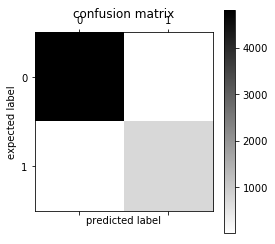

In [14]:
plt.matshow(confusion_matrix(messages['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [89]:
print (classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       1.00      1.00      1.00      4827
       spam       0.98      1.00      0.99       747

avg / total       1.00      1.00      1.00      5574



In [90]:
#QUESTION 6    ANSWER:


%time spam_detector = MultinomialNB().fit(messages_bow, messages['label'])

CPU times: user 20.9 ms, sys: 2.27 ms, total: 23.2 ms
Wall time: 22.2 ms


In [91]:
all_predictions = spam_detector.predict(messages_bow)
print (all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [92]:
print ('accuracy', accuracy_score(messages['label'], all_predictions))
print ('confusion matrix\n', confusion_matrix(messages['label'], all_predictions))
print ('(row=expected, col=predicted)')

accuracy 0.990670972372
confusion matrix
 [[4803   24]
 [  28  719]]
(row=expected, col=predicted)


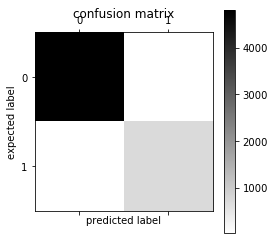

In [93]:
plt.matshow(confusion_matrix(messages['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [94]:
print (classification_report(messages['label'], all_predictions))

             precision    recall  f1-score   support

        ham       0.99      1.00      0.99      4827
       spam       0.97      0.96      0.97       747

avg / total       0.99      0.99      0.99      5574

